In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU,GlobalAveragePooling2D
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow import keras
from matplotlib.widgets import Slider
from tensorflow.keras.layers import Input
# from tensorflow.keras.layers.experimental import preprocessing
# from keras.preprocessing.image import ImageDataGenerator


In [3]:
import pickle
import numpy as np

# Function to load a CIFAR-10 batch
def load_batch(file):
    with open(file, 'rb') as fo:
        batch_dict = pickle.load(fo, encoding='bytes')
    return batch_dict

# Paths to the batches
file1 = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/data_batch_1"
file2 = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/data_batch_2"
file3 = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/data_batch_3"
file4 = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/data_batch_4"


# Load the first batch
dict_combined = load_batch(file1)

# # Ensure the data and labels are numpy arrays
dict_combined[b'data'] = np.array(dict_combined[b'data'])
dict_combined[b'labels'] = np.array(dict_combined[b'labels'])

# Load the remaining batches and concatenate
for file in [file2, file3, file4]:
    batch = load_batch(file)
    dict_combined[b'data'] = np.concatenate((dict_combined[b'data'], np.array(batch[b'data'])), axis=0)
    dict_combined[b'labels'] = np.concatenate((dict_combined[b'labels'], np.array(batch[b'labels'])), axis=0)

print(type(dict_combined[b'data']))
print("Combined data shape:", dict_combined[b'data'].shape)
print("Combined labels length:", len(dict_combined[b'labels']))


<class 'numpy.ndarray'>
Combined data shape: (40000, 3072)
Combined labels length: 40000


In [ ]:
print(dict_combined[b'data'][:3])
print(dict_combined[b'labels'][:3])

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]]
[6 9 9]


In [ ]:
file5 = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/data_batch_5"
validation = load_batch(file5)
validation[b'data']= np.array(validation[b'data'])
validation[b'labels']= np.array(validation[b'labels'])

print("validation data shape:",validation[b'data'].shape)
print("validation labels shape:",validation[b'labels'].shape)


validation data shape: (10000, 3072)
validation labels shape: (10000,)


normarlizing and one hot encoding

In [ ]:
dict_combined[b'data'] = dict_combined[b'data'].reshape((40000, 32, 32, 3))
dict_combined[b'data'] = dict_combined[b'data']/225.0
validation[b'data'] = validation[b'data'].reshape((10000,32,32,3))
validation[b'data'] = validation[b'data']/225.0

dict_combined[b'labels'] = tf.one_hot(dict_combined[b'labels'],depth =10)
validation[b'labels'] = tf.one_hot(validation[b'labels'],depth =10)

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

Data augmentation and creating tensorflow datasets


In [ ]:

train_data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomZoom(0.15),
    preprocessing.RandomHeight(0.15),
    preprocessing.RandomWidth(0.15),
], name="data_augmentation")

train_dataset = tf.data.Dataset.from_tensor_slices((dict_combined[b'data'], dict_combined[b'labels'])).batch(32).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((validation[b'data'], validation[b'labels'])).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset = train_dataset.map(lambda x, y: (train_data_augmentation(x, training=True), y))

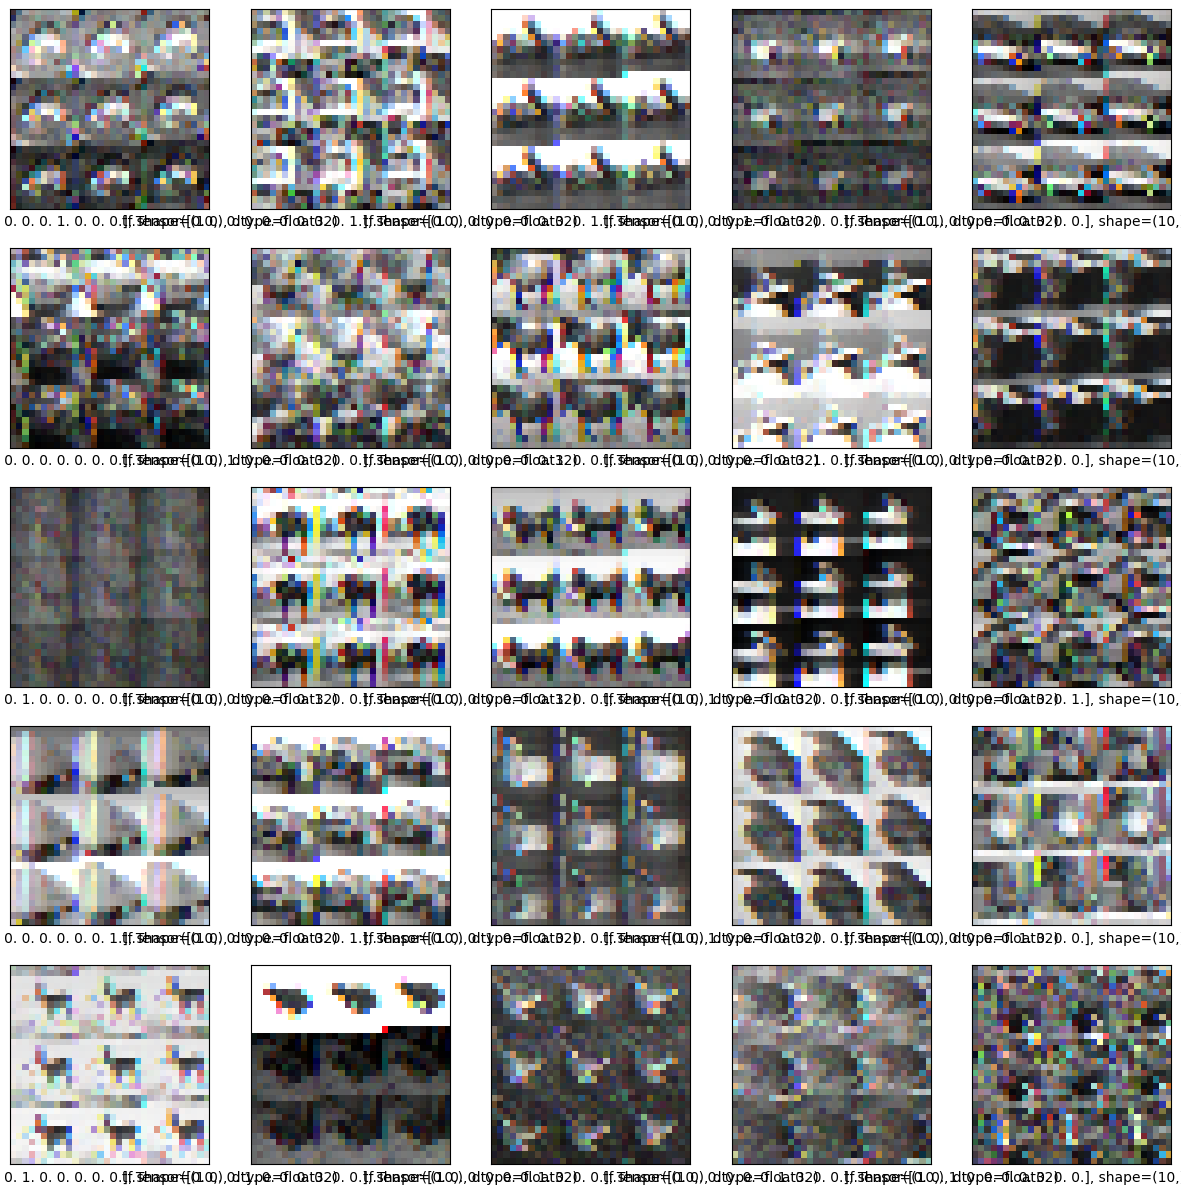

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = dict_combined[b'data'][j]
    plt.imshow(data_plot)
    plt.xlabel(str(dict_combined[b'labels'][j]))
plt.show()

Sequential Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
#plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.activations import linear, relu, sigmoid
# # Example using TensorFlow and Keras
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64,activation = 'relu'))
# model.add(Dense(10, activation='softmax'))  # Output layer
model = tf.keras.Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.3),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.3),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.5),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Output Layer
    Dense(10, activation='softmax')
])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5) #if val loss decrease for 5 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "model_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

# Creating learning rate reduce callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, #multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=3,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)
model.fit(dict_combined[b'data'],dict_combined[b'labels'] ,epochs=50,validation_data=(validation[b'data'],validation[b'labels']),callbacks = [early_stopping,model_checkpoint,reduce_lr])


Epoch 1/50
1250/1250 [==============================] - 355s 280ms/step - loss: 1.9739 - accuracy: 0.3171 - val_loss: 1.6584 - val_accuracy: 0.4177 - lr: 0.0010
Epoch 2/50
1250/1250 [==============================] - 348s 278ms/step - loss: 1.5432 - accuracy: 0.4435 - val_loss: 1.4267 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 3/50
1250/1250 [==============================] - 345s 276ms/step - loss: 1.3959 - accuracy: 0.4986 - val_loss: 1.3063 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 4/50
1250/1250 [==============================] - 349s 279ms/step - loss: 1.2954 - accuracy: 0.5407 - val_loss: 1.1954 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 5/50
1250/1250 [==============================] - 348s 279ms/step - loss: 1.2277 - accuracy: 0.5666 - val_loss: 1.1641 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 6/50
1250/1250 [==============================] - 346s 277ms/step - loss: 1.1662 - accuracy: 0.5925 - val_loss: 1.2730 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 7/50
1250/1250 [============

In [ ]:
model.save('/content/drive/MyDrive/models/Sequential_Model')

Load Sequential model

In [ ]:
from tensorflow.keras.models import load_model

Sequential_model = load_model('/content/drive/MyDrive/models/Sequential_Model')

test data

In [4]:
test_file = "/content/drive/MyDrive/cifar-10-python/cifar-10-batches-py/test_batch"
test = load_batch(test_file)
test[b'data']= np.array(test[b'data'])
test[b'labels']= np.array(test[b'labels'])

print("test data shape:",test[b'data'].shape)
print("test labels shape:",test[b'labels'].shape)
test[b'data'] = test[b'data'].reshape((10000,32,32,3))
test[b'data'] = test[b'data']/225

test data shape: (10000, 3072)
test labels shape: (10000,)


Sequential model test

In [ ]:
# Get the predictions of the model on the test dataset
predictions = Sequential_model.predict(test[b'data'])

# Convert the predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test[b'labels']

# Calculate the accuracy by comparing predicted labels with true labels
accuracy = np.mean(predicted_labels == true_labels)

print(predicted_labels)
print(true_labels)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 25s 78ms/step
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]
Test Accuracy: 0.7379


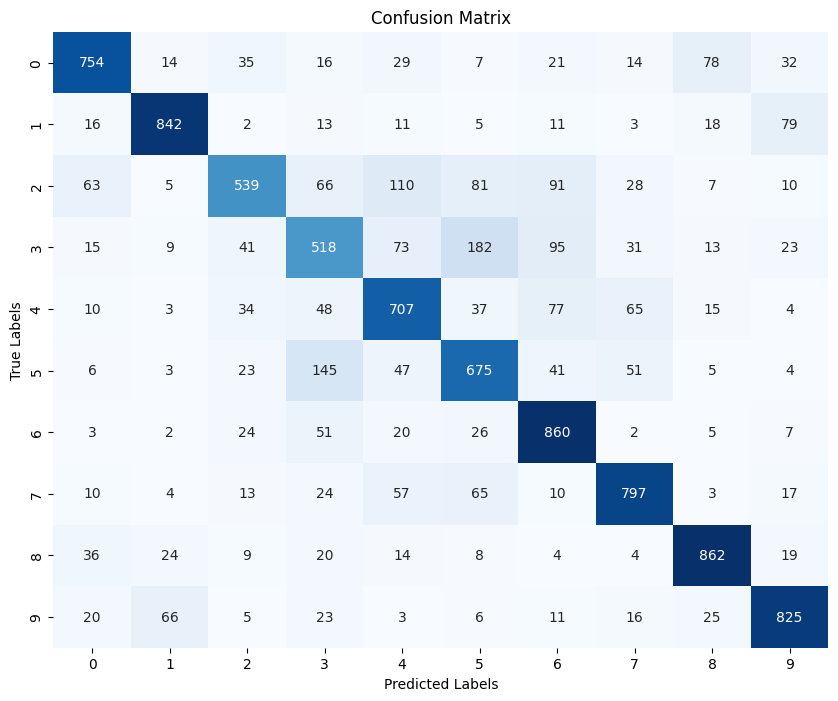

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# # Get the predictions of the model on the test dataset
# predictions = model.predict(test_data)
# predicted_labels = np.argmax(predictions, axis=1)

# # Get the true labels from the test data
# true_labels = np.argmax(test_labels, axis=1)  # Assuming test_labels is in one-hot encoded format

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
if conf_matrix.shape == (2, 2):
  TN, FP, FN, TP = conf_matrix.ravel()
  print(f"True Negatives (TN): {TN}")
  print(f"False Positives (FP): {FP}")
  print(f"False Negatives (FN): {FN}")
  print(f"True Positives (TP): {TP}")
  truth_table = np.array([[TN, FP],
                            [FN, TP]])

      # Plotting the confusion matrix (truth table)
  plt.figure(figsize=(6, 4))
  sns.heatmap(truth_table, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix (Truth Table)')
  plt.show()
else:
    print("The confusion matrix is not for a binary classification problem.")

The confusion matrix is not for a binary classification problem.


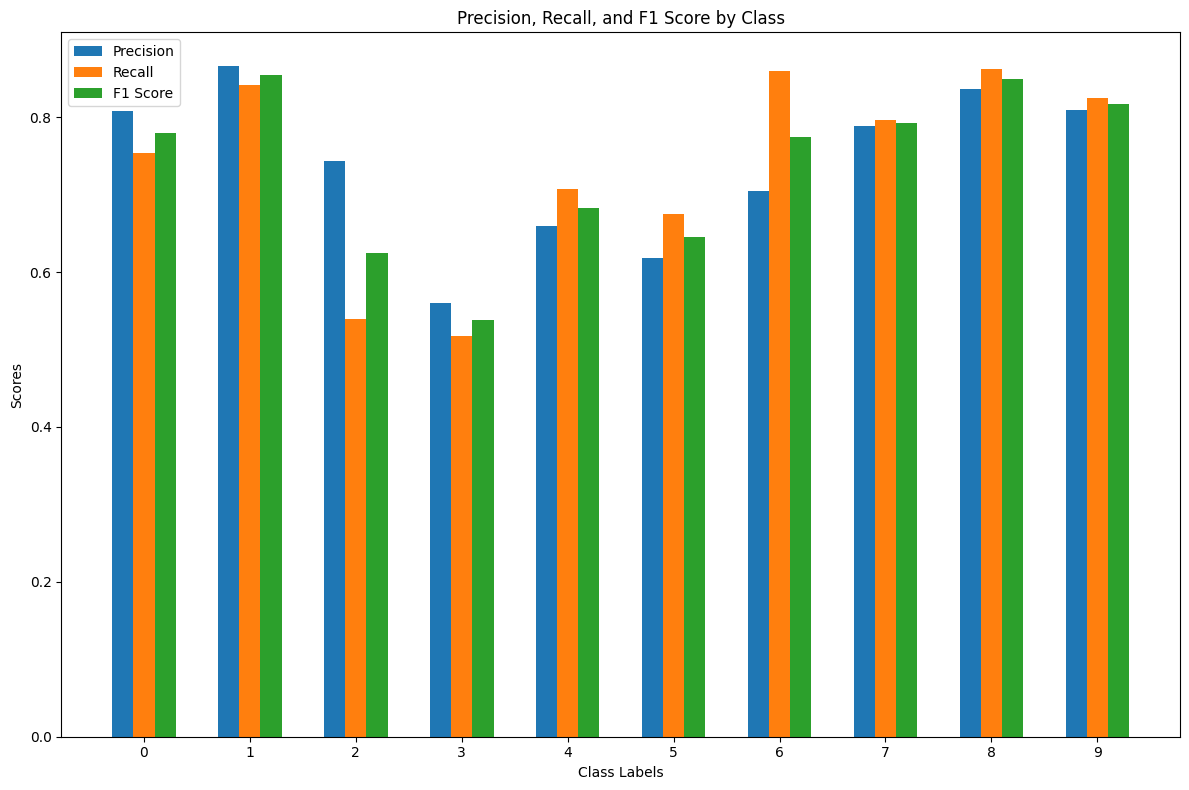

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'test_data' and 'test_labels' are your test datasets

# # Get the predictions of the model on the test dataset
# predictions = model.predict(test_data)
# predicted_labels = np.argmax(predictions, axis=1)  # Converts the one-hot encoded predictions to class labels

# # Get the true labels from the test data
# true_labels = np.argmax(test_labels, axis=1)  # Assuming test_labels is in one-hot encoded format

# Compute precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None)

# Plot the metrics
labels = np.unique(true_labels)
x = np.arange(len(labels))  # label locations

width = 0.2  # width of the bars
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Class Labels')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

transfer learning model : MobileNetV2

In [ ]:
dict_combined[b'labels'] = tf.cast(dict_combined[b'labels'], tf.int32)
validation[b'labels'] = tf.cast(validation[b'labels'], tf.int32)

print("Original combined data shape:", dict_combined[b'data'].shape)
print("Original validation data shape:", validation[b'data'].shape)

# Reshape the data
dict_combined[b'data'] = dict_combined[b'data'].reshape((40000, 32, 32, 3)).astype('float32') / 255.0
validation[b'data'] = validation[b'data'].reshape((10000, 32, 32, 3)).astype('float32') / 255.0

# Convert labels to one-hot encoding
dict_combined[b'labels'] = tf.one_hot(dict_combined[b'labels'], depth=10)
validation[b'labels'] = tf.one_hot(validation[b'labels'], depth=10)

print("Reshaped combined data shape:", dict_combined[b'data'].shape)
print("Reshaped validation data shape:", validation[b'data'].shape)
print("Combined labels shape:", dict_combined[b'labels'].shape)
print("Validation labels shape:", validation[b'labels'].shape)


Original combined data shape: (40000, 3072)
Original validation data shape: (10000, 3072)
Reshaped combined data shape: (40000, 32, 32, 3)
Reshaped validation data shape: (10000, 32, 32, 3)
Combined labels shape: (40000, 10)
Validation labels shape: (10000, 10)


In [ ]:
for images, labels in tf.data.Dataset.from_tensor_slices((dict_combined[b'data'], dict_combined[b'labels'])).batch(32).take(1):
    print("Before resizing - Images shape:", images.shape)

Before resizing - Images shape: (32, 32, 32, 3)


In [ ]:
# def preprocess(image, label):
#     #image = tf.reshape(image, [32, 32, 3])
#     image = tf.image.resize(image, (224, 224))
#     image = tf.cast(image, tf.float32)  # Normalize the image
#     return image, label

# Data augmentation
train_data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomZoom(0.15),
    preprocessing.RandomHeight(0.15),
    preprocessing.RandomWidth(0.15),
], name="data_augmentation")

def preprocess(image, label, training=False):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    if training:
        image = train_data_augmentation(image)
    return image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict_combined[b'data'], dict_combined[b'labels']))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing
#train_dataset = train_dataset.map(lambda x, y: (train_data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

valid_dataset = tf.data.Dataset.from_tensor_slices((validation[b'data'], validation[b'labels']))
valid_dataset = valid_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

print(len(train_dataset))
print(len(valid_dataset))

# # Load the MobileNetV2 model without the top layers and with an input tensor of shape (224, 224, 3)
# Mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

ValueError: in user code:

    File "<ipython-input-5-c731fccf997b>", line 17, in preprocess  *
        image = tf.image.resize(image, (224, 224))  # Resize to 224x224

    ValueError: 'images' must have either 3 or 4 dimensions.


In [ ]:
for images, labels in train_dataset.take(1):
    print(images.shape)  # Should print (batch_size, 224, 224, 3)
    print(labels.shape)

(32, 224, 224, 3)
(32, 10)


In [ ]:
# Remove the existing top layers
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2

input_tensor = Input(shape=(224, 224, 3))

# Load MobileNetV2 with pre-trained weights from ImageNet
Mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Mobilenet_model.layers.pop()
# Mobilenet_model.layers.pop()

# Freeze the remaining layers
for layer in Mobilenet_model.layers:
    layer.trainable = False

# Add new classification layers for your task
x = Mobilenet_model.output
x = GlobalAveragePooling2D()(x)  # Add global average pooling layer
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create a new model
Mobilenet_model_new = tf.keras.Model(inputs=Mobilenet_model.input, outputs=output)
Mobilenet_model_new.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
Mobilenet_model_new.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
# Compile and train the model with your data

history = Mobilenet_model_new.fit(train_dataset,epochs=50,validation_data=valid_dataset,callbacks = [early_stopping,model_checkpoint,reduce_lr])

Epoch 1/50
1250/1250 [==============================] - 325s 258ms/step - loss: 1.4569 - accuracy: 0.4818 - val_loss: 1.3883 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 2/50
1250/1250 [==============================] - 318s 255ms/step - loss: 1.2618 - accuracy: 0.5506 - val_loss: 1.3593 - val_accuracy: 0.5219 - lr: 0.0010
Epoch 3/50
1250/1250 [==============================] - 300s 240ms/step - loss: 1.1662 - accuracy: 0.5860 - val_loss: 1.3668 - val_accuracy: 0.5297 - lr: 0.0010
Epoch 4/50
1250/1250 [==============================] - 304s 243ms/step - loss: 1.0787 - accuracy: 0.6192 - val_loss: 1.3997 - val_accuracy: 0.5324 - lr: 0.0010
Epoch 5/50
1250/1250 [==============================] - ETA: 0s - loss: 0.9999 - accuracy: 0.6478
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1250/1250 [==============================] - 306s 245ms/step - loss: 0.9999 - accuracy: 0.6478 - val_loss: 1.4433 - val_accuracy: 0.5306 - lr: 0.0010
Epoch 6/50
1250/1250 [=========

In [ ]:
Mobilenet_model_new.save('/content/drive/MyDrive/models/Mobilenet_Model_fit')

NameError: name 'Mobilenet_model_new' is not defined

In [ ]:
def preprocess(image, label):
    #image = tf.reshape(image, [32, 32, 3])
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32)  # Normalize the image
    label = tf.one_hot(label, depth=10)
    return image, label

test_dataset = tf.data.Dataset.from_tensor_slices((test[b'data'], test[b'labels']))
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
print(len(test_dataset))

313


In [ ]:
from tensorflow.keras.models import load_model

mobilenet_model = load_model('/content/drive/MyDrive/models/Mobilenet_Model_fit')
test_loss = mobilenet_model.evaluate(test_dataset)
print("Test Loss:", test_loss)

313/313 [==============================] - 438s 1s/step - loss: 1.3699 - accuracy: 0.5588
Test Loss: [1.3699113130569458, 0.5587999820709229]


In [ ]:
predictions = mobilenet_model.predict(test_dataset)

# Convert the predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_dataset.classes

# Calculate the accuracy by comparing predicted labels with true labels
accuracy = np.mean(predicted_labels == true_labels)

print(predicted_labels)
print(true_labels)
print("Test Accuracy:", accuracy)

 17/313 [>.............................] - ETA: 6:21

KeyboardInterrupt: 

VGGNet model


In [ ]:
from tensorflow.keras.applications import VGG16

vgg_model2 = VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.models import load_model
#vgg_model = load_model('/content/drive/MyDrive/models/vgg_Model')
vgg_model2.layers.pop()
vgg_model2.layers.pop()

# Freeze the remaining layers
for layer in vgg_model2.layers:
    layer.trainable = False

# Add new classification layers for your task
output = Dense(9, activation='softmax')(vgg_model2.layers[-1].output)

# Create a new model
model2 = tf.keras.Model(inputs=vgg_model2.inputs, outputs=output)

# Compile and train the model with your data
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model2.fit(train_generator, epochs=10,validation_data=validation_generator)

In [ ]:
# Assuming vgg_model is your pre-trained VGGNet model
vgg_output_shape = vgg_model2.layers[-2].output_shape
features_shape = vgg_output_shape[1]  # Assuming the output is of shape (batch_size, features_shape)

print("Features Shape:", features_shape)


Features Shape: 4096


In [ ]:
from keras.utils import to_categorical

# Assuming train_generator.classes contains class labels
# One-hot encode the class labels
train_labels_one_hot = to_categorical(train_generator.classes, num_classes=9)
validation_labels_one_hot = to_categorical(validation_generator.classes, num_classes=9)


In [ ]:
# Remove the fully connected layers for feature extraction
feature_extractor = tf.keras.Model(inputs=vgg_model2.inputs, outputs=vgg_model2.layers[-2].output)

# Extract features from your data
train_features = feature_extractor.predict(train_generator)
val_features = feature_extractor.predict(validation_generator)
print(train_features.shape[1])
# Train a classifier using the extracted features
classifier = Sequential([
    Dense(128, activation='relu', input_shape=(4096,)),
    Dense(9, activation='softmax')
])
#train_generator.classes = np.expand_dims(train_generator.classes, axis=-1)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features,train_labels_one_hot, epochs=10, validation_data=(val_features, validation_labels_one_hot))


1/1 [==============================] - 10s 10s/step
4096


In [ ]:
classifier.save('/content/drive/MyDrive/models/vgg_Model_feature')

In [ ]:
print(train_generator.classes.shape)


(77,)


In [ ]:
from tensorflow.keras.models import load_model
feature_model = load_model('/content/drive/MyDrive/models/vgg_Model_feature')

In [ ]:
feature_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               524416    
                                                                 
 dense_11 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 525,577
Trainable params: 525,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_data, _ = next(test_generator)  # Retrieve a batch of data (ignoring labels)
batch_shape = batch_data.shape
batch_size = batch_shape[0]  # Extract the batch size
input_shape = batch_shape[1:]  # Extract the input shape excluding batch size
print("Batch Size:", batch_size)
print(batch_shape)
print("Input Shape (Excluding Batch Size):", input_shape)

Batch Size: 20
(20, 224, 224, 3)
Input Shape (Excluding Batch Size): (224, 224, 3)


In [ ]:
# Retrieve a batch of data from the test generator
batch_data, _ = next(test_generator)

# Print the shape of the batch data
print("Batch Data Shape:", batch_data.shape)


Batch Data Shape: (20, 224, 224, 3)


In [ ]:
import numpy as np

# Assuming your test data batch has the shape (16, 224, 224, 3)
# Replace this with the actual shape of your test data batch
test_data_batch, _ = next(test_generator)

# Reshape the test data batch to match the input shape expected by the model
reshaped_test_data = test_data_batch.reshape((735, 4096))

# Now, you can use reshaped_test_data for prediction


In [ ]:
import numpy as np

# Print the shape of the input array
print("Input array shape:", test_data_batch.shape)

# Calculate the size of the input array
input_array_size = test_data_batch.size

# Print the desired reshaped size
print("Desired reshaped size:", (20, 4096))

# Calculate the size of the reshaped array
reshaped_array_size = 20 * 4096

# Print the sizes
print("Input array size:", input_array_size)
print("Reshaped array size:", reshaped_array_size)

NameError: name 'test_data_batch' is not defined

In [ ]:

from tensorflow.keras.applications import VGG16
# Calculate the number of samples in the test generator
num_samples = test_generator.samples

# Split the test generator into two parts
split_index = num_samples // 2

test_data1 = []
test_labels1 = []

test_data2 = []
test_labels2 = []

# Retrieve the first half of the data
for i in range(split_index):
    data, labels = test_generator.next()
    test_data1.append(data)
    test_labels1.append(labels)

# Retrieve the second half of the data
for i in range(split_index, num_samples):
    data, labels = test_generator.next()
    test_data2.append(data)
    test_labels2.append(labels)

# Concatenate the test data and labels
test_data1 = np.concatenate(test_data1, axis=0)
test_labels1 = np.concatenate(test_labels1, axis=0)

test_data2 = np.concatenate(test_data2, axis=0)
test_labels2 = np.concatenate(test_labels2, axis=0)

# Extract features using the feature extractor model
test_features1 = feature_extractor.predict(test_data1)
test_features2 = feature_extractor.predict(test_data2)

# Combine the features and labels from both parts
combined_test_features = np.concatenate([test_features1, test_features2], axis=0)
combined_test_labels = np.concatenate([test_labels1, test_labels2], axis=0)


NameError: name 'feature_extractor' is not defined

In [ ]:
# Function to resize and preprocess each batch of data
def preprocess_data(generator):
    resized_batch = []
    batch_labels = []
    for batch_data, batch_labels in generator:
        for img in batch_data:
            resized_img = tf.image.resize(img, (224, 224))  # Resize each image
            resized_batch.append(resized_img)
        batch_labels.append(batch_labels)  # Store batch labels

    resized_batch = np.array(resized_batch)  # Convert to numpy array
    preprocessed_batch = tf.keras.applications.vgg16.preprocess_input(resized_batch)  # Preprocess the batch

    return preprocessed_batch, batch_labels


In [ ]:
preprocessed_data1, labels1 = preprocess_data(test_generator1)
resized_test_data.extend(preprocessed_data1)
test_labels.extend(labels1)

# Preprocess data using test_generator2
preprocessed_data2, labels2 = preprocess_data(test_generator2)
resized_test_data.extend(preprocessed_data2)
test_labels.extend(labels2)

# Convert to numpy arrays
resized_test_data = np.array(resized_test_data)
test_labels = np.array(test_labels)


In [ ]:
# Extract features using the VGGNet model
test_features = feature_extractor.predict(resized_test_data)


(None, 9)


In [ ]:
predictions = feature_model.predict(reshaped_test_data)

# Convert the predictions from one-hot encoded format to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Calculate the accuracy by comparing predicted labels with true labels
accuracy = np.mean(predicted_labels == true_labels)

print(predicted_labels)
print(true_labels)
print("Test Accuracy:", accuracy)

23/23 [==============================] - 0s 3ms/step


ValueError: operands could not be broadcast together with shapes (735,) (20,) 

Pretrained Vision transfomer

In [ ]:
!pip install torch transformers

In [ ]:
import psutil
import os

def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 ** 2)  # in MB

print("Memory usage:", get_memory_usage(), "MB")


Memory usage: 96.58984375 MB


In [ ]:
import torch
from torch import nn, optim
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image

In [ ]:
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader, Dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Check if the input is a file path or a NumPy array
        if isinstance(self.image_paths[idx], str):
            image = Image.open(self.image_paths[idx]).convert("RGB")
        elif isinstance(self.image_paths[idx], np.ndarray):
            image = Image.fromarray(self.image_paths[idx]).convert("RGB")
        else:
            raise ValueError("Unsupported image format")

        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label
# print(model)
num_classes = 10  # Replace with the number of your classes
# model.classifier = nn.Linear(model.classifier[0].in_features, num_classes)
in_features = model.classifier.in_features  # Access in_features directly
model.classifier = nn.Linear(in_features, num_classes)
# Create a new classifier layer with the appropriate number of output classes
# model.classifier = nn.Linear(in_features, num_classes)
model.classifier = nn.Sequential(
    nn.Linear(model.classifier.in_features, num_classes),
    nn.Softmax(dim=1))

for parameters in model.parameters():
    parameters.requires_grad = False

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
  # Replace with your labels
dataset = CustomDataset(dict_combined[b'data'], dict_combined[b'labels'], transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True,num_workers=4, pin_memory=True)
# set_seeds()
# pretrained.vit.head = nn.Linear(768, 10)
# pretrained_vit.to(device)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4)
scaler = torch.cuda.amp.GradScaler()

In [ ]:
for param in model.parameters():
    param.requires_grad = True
model.train()
num_epochs = 10
accumulation_steps = 4
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    optimizer.zero_grad()
    for i, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)

        with torch.cuda.amp.autocast():
            outputs = model(images)
            logits = outputs.logits
            loss = criterion(logits, labels) / accumulation_steps

        scaler.scale(loss).backward()

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        running_loss += loss.item() * accumulation_steps

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}")

Epoch 1, Loss: 2.095060106945038
Epoch 2, Loss: 2.0172601983070373
Epoch 3, Loss: 1.9776073596000672
Epoch 4, Loss: 1.9514996918678285
Epoch 5, Loss: 1.9273159443855286
Epoch 6, Loss: 1.9085606013298035
Epoch 7, Loss: 1.8852430353164673
Epoch 8, Loss: 1.8670076539039613
Epoch 9, Loss: 1.8473654499053955
Epoch 10, Loss: 1.830438378429413


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/models/Vit_model")

Load vit trained model

In [5]:
import torch
from transformers import ViTForImageClassification

# Load the pretrained model
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Modify the classifier to match your number of classes
num_classes = 10  # Set this to the number of classes your model was fine-tuned on
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, num_classes)

# Load the saved state dictionary
state_dict = torch.load('/content/drive/MyDrive/models/Vit_model')

# Adjust the keys in the state dictionary to match the current model's classifier
new_state_dict = {}
for key in state_dict.keys():
    new_key = key.replace('classifier.0.', 'classifier.')
    new_state_dict[new_key] = state_dict[key]

# Load the modified state dictionary into the model
vit_model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
vit_model.eval()

# Now you can use the model for inference or further fine-tuning



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [6]:
vit_model.eval()

# Move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model.to(device)

# Convert test data to a tensor and move it to the appropriate device
test_data_tensor = torch.tensor(test[b'data']).to(device)




In [7]:
print(test_data_tensor.shape)

torch.Size([10000, 32, 32, 3])


In [8]:
# Assuming test[b'data'] is of shape (batch_size, height, width)
test_data = test[b'data']

# Convert to a 3-channel RGB format (if needed)
if test_data.shape[1] != 3:
    test_data = np.repeat(test_data[:, np.newaxis, :, :], 3, axis=1)  # Repeat the channel 3 times

# Now convert to a tensor and move to the device
test_data_tensor = torch.tensor(test_data).to(device)


In [9]:
test_data_tensor = test_data_tensor.mean(dim=-1)

# Now the shape should be correct for reshaping
test_data_tensor = test_data_tensor.view(10000, 3, 32, 32)
print(test_data_tensor.shape)  # Should output torch.Size([10000, 3, 32, 32])


torch.Size([10000, 3, 32, 32])


In [10]:
import torch.nn.functional as F

# test_data_tensor_gpu = test_data_tensor.gpu()
test_data_tensor_resized = F.interpolate(test_data_tensor, size=(224, 224), mode='bilinear', align_corners=False)

In [11]:
test_loader = torch.utils.data.DataLoader(test_data_tensor_resized, batch_size=128, shuffle=False)

predicted_labels_vit = []

with torch.no_grad():
    for batch in test_loader:
        outputs = vit_model(batch.to(device))
        logits = outputs.logits
        predicted_labels_vit.extend(torch.argmax(logits, dim=1).cpu().numpy())

predicted_labels_vit = np.array(predicted_labels_vit)


In [13]:
# Calculate accuracy
true_labels_vit = np.array(test[b'labels'])
accuracy_vit = np.mean(predicted_labels_vit == true_labels_vit)

print(predicted_labels_vit)
print(true_labels_vit)
print("Test Accuracy:", accuracy_vit)

[0 0 0 ... 0 0 5]
[3 8 8 ... 5 1 7]
Test Accuracy: 0.1663


In [ ]:
output = Dense(9, activation='softmax')(model.layers[-1].output)

# Create a new model
model = tf.keras.Model(inputs=model.inputs, outputs=output)

AttributeError: 'ViTForImageClassification' object has no attribute 'layers'